In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
import joblib

In [72]:
path = './Dataset'
file = os.path.join(path, 'Mall_Customers.csv')

In [73]:
"""
Reading a csv file into a list of dictionaries 
"""
with open(file, 'r') as csv_file:
    """
    table_list reads the file into a list of lists while ignoring the \n character
    """
    table_list = [line[:-1].split(',') for line in csv_file.readlines()]
    table_data = [{table_list[0][key]: val for key, val in enumerate(line)} for line in table_list[1:]]

In [74]:
df = pd.DataFrame(table_data)

In [75]:
# df.describe()

In [76]:
class EDA:
    def __init__(self, dataset):
        self.dataset = dataset
        
    def basicInfo(self):
        """
        Inspecting various information about the dataset
        """
        print("\n ### Verifying the data types of various features \n")
        print(self.dataset.dtypes)
        print("\n ### Checking the count of unique entries for each feature \n")
        print(self.dataset.nunique())
        print("\n ### Checking the count of null entries for each feature \n")
        print(self.dataset.isnull().sum())
        print("\n ### Checking the statistical information of each feature \n")
        print(self.dataset.describe())
        
    def changeDtypes(self):
        """
        Let us change the datatypes of features to float except form gender
        """
        for i in self.dataset.drop('Gender', axis=1):      
            self.dataset[i] = self.dataset[i].astype(float)
            
    def genderDistribution(self):
        """
        Distribution of the dataset by Gender
        """
        genderDistribution = self.dataset['Gender'].value_counts() / len(self.dataset['Gender'].value_counts())
        plt.figure(figsize = (10,5))
        plt.pie(genderDistribution, labels = genderDistribution.index, autopct='%.1f%%')
        plt.title('Distribution of the dataset by Gender')
        plt.show()
        
    def featureComparison(self, feature1, feature2):
        plt.figure(figsize=(10,5))
        plt.scatter(x = feature1, y = feature2, data = df)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'Plot of {feature1} vs {feature2}')
        
    def bucketsComparisons(self, feature):
        """
        Since these are contious data, we are going to split them into buckets and see the distributions by Gender info
        """
        if feature == 'Age':
            bins, labels = [18, 30, 40, 50, 70], ['AudienceInTwenties','AudienceInThirties','AudienceInForties','AudienceInFifties']

        elif feature == 'Annual Income (k$)':
            bins, labels = [15, 50, 80, 137], ['LowIncomeEaners','MediumIncomeEaners','HighIncomeEaners']

        elif feature == 'Spending Score (1-100)':
            bins, labels = [1, 40, 70, 100], ['LowSpendingScore','MediumSpendingScore','HighSpendingScore']

        features = pd.cut(df[feature], bins = bins, labels = labels)
        plt.figure(figsize=(10,6))
        plt.title(f'{feature} Composition by gender')
        sns.countplot(x = features, hue='Gender', data = df)

In [77]:
exploratoryAnalysis = EDA(dataset = df)

In [78]:
exploratoryAnalysis.basicInfo()


 ### Verifying the data types of various features 

CustomerID                object
Gender                    object
Age                       object
Annual Income (k$)        object
Spending Score (1-100)    object
dtype: object

 ### Checking the count of unique entries for each feature 

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

 ### Checking the count of null entries for each feature 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 ### Checking the statistical information of each feature 

       CustomerID  Gender  Age Annual Income (k$) Spending Score (1-100)
count         200     200  200                200                    200
unique        200       2   51                 64                     84
top            94  Female   32                 78 

In [79]:
exploratoryAnalysis.changeDtypes()

In [80]:
df.dtypes

CustomerID                float64
Gender                     object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [81]:
#From the above, all the features have been converted except for the gender

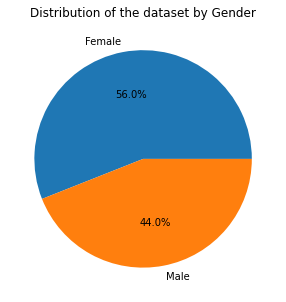

In [82]:
exploratoryAnalysis.genderDistribution()

In [83]:
#From the above chart, the proportion of female population is higher than male population.

In [84]:
# def spending(feature):
#     plt.figure(figsize = (20,8))
#     sns.pairplot(df[[feature]], kind = 'kde')

In [85]:
# spending('Annual Income (k$)')

In [86]:
# spending('Spending Score (1-100)')

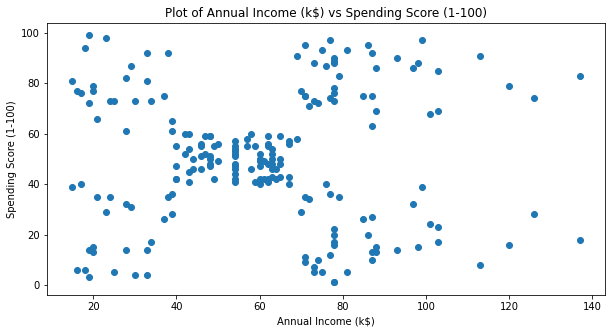

In [87]:
exploratoryAnalysis.featureComparison('Annual Income (k$)', 'Spending Score (1-100)')

### Annual income and Spending Score splits the data to some noticeable groups

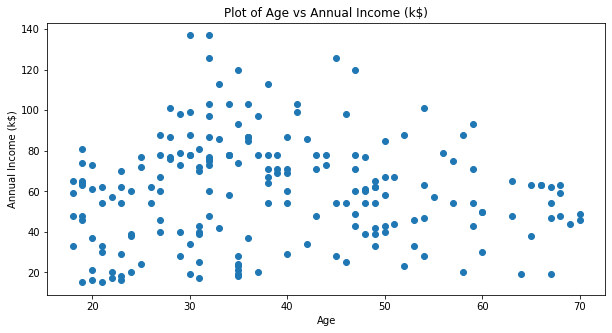

In [88]:
exploratoryAnalysis.featureComparison('Age', 'Annual Income (k$)')

### Population between 30 to 50 years consists of higher eaners and population below 30 and above 50 are mainly low eaners

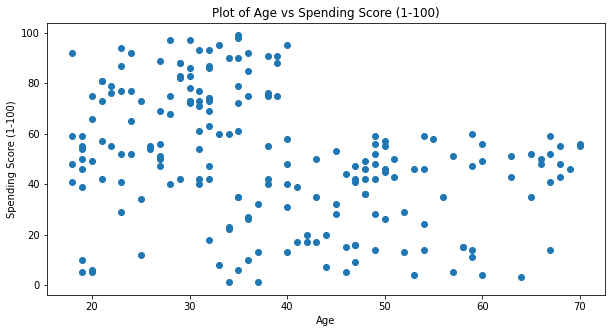

In [89]:
exploratoryAnalysis.featureComparison('Age','Spending Score (1-100)')

### Population of below 40 years comprises mainly of high and medium spenders whereas population above 40 years are mainly of medium and low spenders probably they are keen on investiments.

In [90]:
# """
# Basic statistical information about the dataset
# """
# df.describe()

### There are no large disparities on the scales used for features

In [91]:
#comparison of age, income and spending by gender

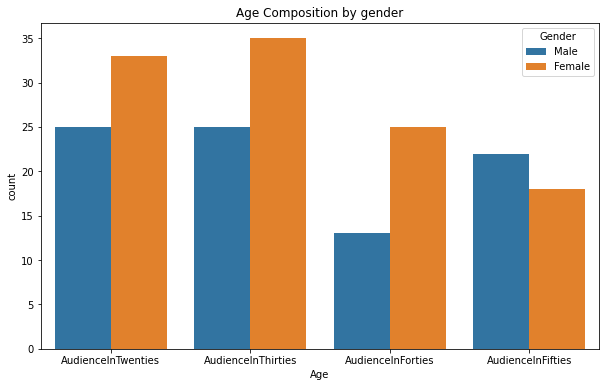

In [92]:
exploratoryAnalysis.bucketsComparisons('Age')

### Most of the audience are below 40 years 
### Most female were below 50 years
### The females were more across all the buckets except for fifties

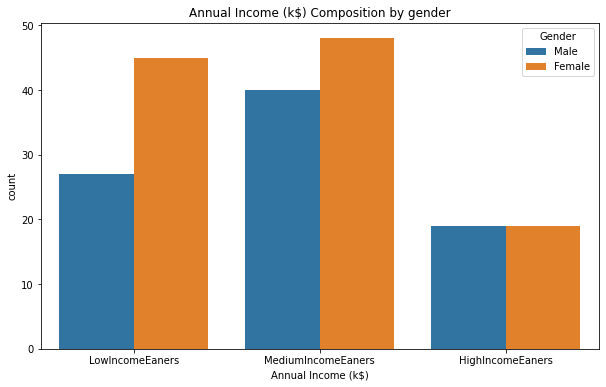

In [93]:
exploratoryAnalysis.bucketsComparisons('Annual Income (k$)')

### Majority of the audience are medium and low earners

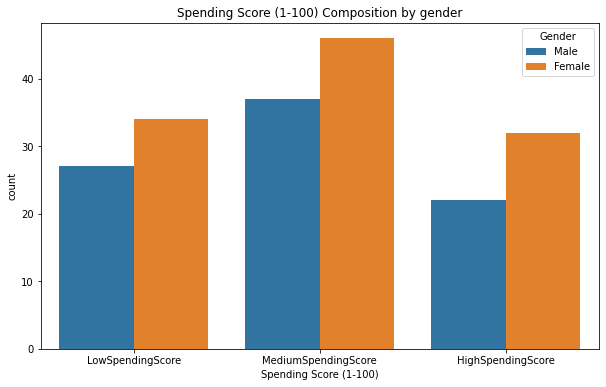

In [94]:
exploratoryAnalysis.bucketsComparisons('Spending Score (1-100)')

### Female audience in general tend to spend more compared to males across all spending buckets

In [95]:
# n_steps = [('one_hot_encode_gender', OneHotEncoder(sparse='False', drop = 'first',
#                                                    handle_unknown = 'error', dtype='int'))]

In [96]:
"""
We will get dummies for the Gender column
We then concat the original dataframe with the dummies and finally drop the Gender Column and CustomerID
"""

# genderDummies = pd.get_dummies(df['Gender'], drop_first = True)

# df = pd.concat([df, genderDummies], axis=1).drop(['Gender','CustomerID'], axis=1)

# mdTransformer = ColumnTransformer([('catTransformer',
#                                                   Pipeline(n_steps), ['Gender'])],
#                                    remainder = 'passthrough')

'\nWe will get dummies for the Gender column\nWe then concat the original dataframe with the dummies and finally drop the Gender Column and CustomerID\n'

In [97]:
"""
Lets create a copy of the original dataframe that we will manipulate and fit into the model
"""

df_copy = df.copy()

In [98]:
# df_copy = pd.DataFrame(mdTransformer.fit_transform(df.iloc[:,1:]))
# df_copy.columns = df.iloc[:,1:].columns

In [99]:
X = df_copy.loc[:,['Age','Annual Income (k$)']]

In [100]:
X.columns.tolist()

['Age', 'Annual Income (k$)']

In [296]:
class Clustering:
    def __init__(self, dataset, n_iters = 10):
        self.dataset = dataset
        self.n_iters = n_iters

    def scoring(self, features):
        """
        These dictionaries will hold cluster inertias, davies_bouldin_score and silhoutte_score 
        when the model is being fitted with varios k values. This will return a dictionary of dictionaries.
        """
        wcss, dbs, shs = {}, {}, {}
        for k in range(2, self.n_iters):
            kmeans = KMeans(n_clusters = k)
            kmeans.fit(self.dataset[features])
            clusters = kmeans.labels_
            wcss[k] = kmeans.inertia_
            dbs[k] = davies_bouldin_score(X, labels = clusters)
            shs[k] = silhouette_score(X, labels = clusters)      
        
        return {'wcss':wcss, 'dbs':dbs, 'shs':shs,
                'clusterCenters':kmeans.cluster_centers_ , 'clusters': clusters}
    
#     def dbs_shs(self):
#         dbs_vals = sorted(self.scoring()['dbs'].items(), key=lambda x:x[1])[0]
#         shs_vals = sorted(self.scoring()['shs'].items(), key=lambda x:x[1])[-1] 
#         return {'dbs_val': dbs_vals[0], 'shs_vals':shs_vals[0] }
    
    def model(self, features, n_cluster=8):
        score = self.scoring(features)
#         print(score['dbs'])
        dbs_vals = sorted(score['dbs'].items(), key=lambda x:x[1])[0]
        shs_vals = sorted(score['shs'].items(), key=lambda x:x[1])[-1] 
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(self.dataset[features])
        plt.figure(figsize=(12,6))
        plt.scatter(self.dataset[features[0]], self.dataset[features[1]], c = kmeans.labels_)
        return kmeans

        
    def predict(self, feature):
        kmeansModel = self.model()
        plt.figure(figsize=(12,6))
        plt.scatter(self.dataset[features[0]], self.dataset[features[1]], c = kmeans.labels_)

    def plotScores(self):
        scores = self.scoring(self.dataset.columns)
        dbs_vals = sorted(scores['dbs'].items(), key=lambda x:x[1])[0]
        shs_vals = sorted(scores['shs'].items(), key=lambda x:x[1])[-1] 
        """
        Plotting a dendrogram to try and determine the possible number of clusters formed by various features
        """
        plt.figure(figsize=(12, 6))
        plt.title(f"Dendrograms formed by {self.dataset.columns.tolist()} feature names")  
        dend = shc.dendrogram(shc.linkage(self.dataset, method='ward'))
        print("\n")
        
        """
        Plotting a weighed sun of Inertia values to try and determine the possible number of clusters formed by various features
        """
        plt.figure(figsize=(12,6))
        plt.plot(scores['wcss'].keys(), scores['wcss'].values())
        plt.title(f"Weighed Inertia formed by {self.dataset.columns.tolist()} feature names")
        plt.xlabel('Number of clusters')
        plt.ylabel('Weighed inertias')
        print("\n")
        """
        Plotting the davies_bouldine_score against clusters
        """

        plt.figure(figsize=(12,6))
        plt.plot(scores['dbs'].keys(), scores['dbs'].values())
        plt.xlabel('Number of clusters')
        plt.ylabel('Davies Bouldine Score')
        plt.title(f'Minimum davies_bouldine_score occurs when n = {dbs_vals[0]}')
        plt.text(dbs_vals[0], dbs_vals[1], f'minima davies_bouldine_score')
        print("\n")
        """
        Plotting the davies_bouldine_score against clusters
        """
        plt.figure(figsize=(12,6))
        plt.plot(scores['shs'].keys(), scores['shs'].values())
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhoutte Score')
        plt.title(f"Silhoutte Score formed by {self.dataset.columns.tolist()} feature names")
        plt.title(f'Maximum Silhoutte Score occurs when n = {shs_vals[0]}')
        plt.text(shs_vals[0], shs_vals[1], f'maxima silhoutte score')
            

In [297]:
clusterTest = Clustering(df_copy)

In [298]:
point = [80, 80]

[2]


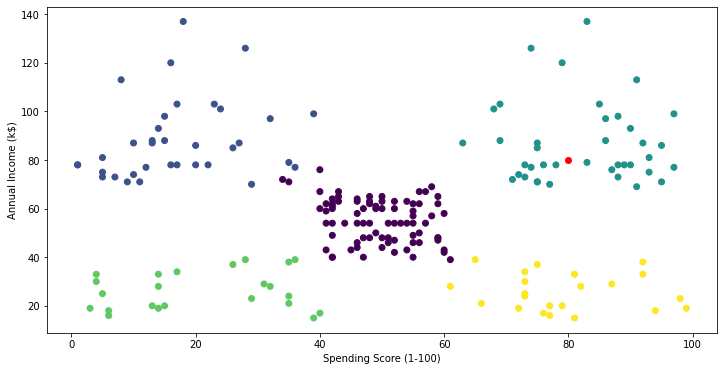

In [299]:
modelOne = clusterTest.model(['Spending Score (1-100)','Annual Income (k$)'], n_cluster = 5)
plt.scatter(x= point[:1], y = point[1:], c='r')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
print(modelOne.predict([point]))
# print(modelOne.cluster_centers_)

In [300]:
filenameOne = 'modelOne.sav'
joblib.dump(modelOne, filenameOne)

['modelOne.sav']

Text(0, 0.5, 'Annual Income (k$)')

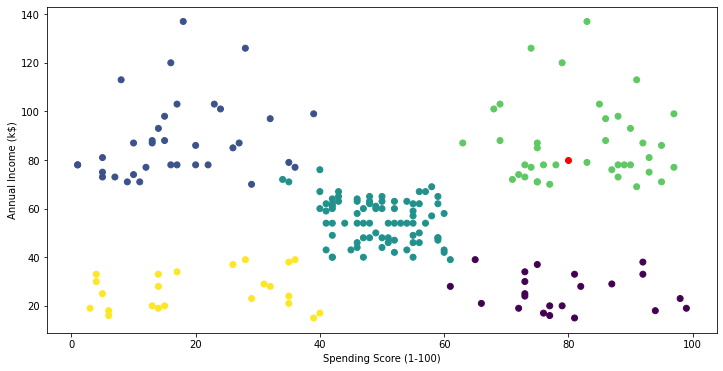

In [301]:
# load the model from disk
loaded_model_one = joblib.load(filename)
clusterTest.model(['Spending Score (1-100)','Annual Income (k$)'], n_cluster = 5)
plt.scatter(x= point[:1], y = point[1:], c='r')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [302]:
filenameOne = 'modelOne.sav'
joblib.dump(modelOne, filenameOne)

['modelOne.sav']

In [303]:
# modelOne = clusterTest.model(['Age','Annual Income (k$)'])

In [304]:
# modelOne.predict([[10,15]])

In [305]:
# clusterTest.scoring(['Age','Annual Income (k$)'])['clusters']

In [306]:
# clusterTest.scoring()

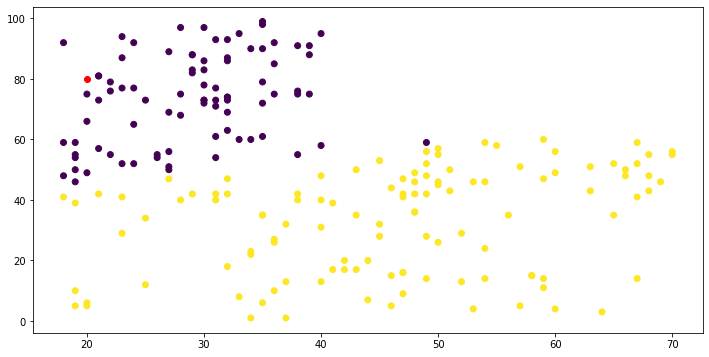

In [307]:
modelThree = clusterTest.model(['Age','Spending Score (1-100)'], 2)
plt.scatter(x= 20, y = 80, c='r')
modelThree.predict([[60,10]])
print()

In [308]:
clusterOne = Clustering(X)

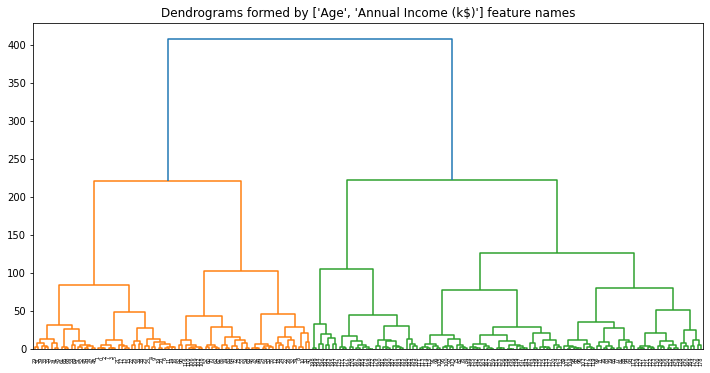

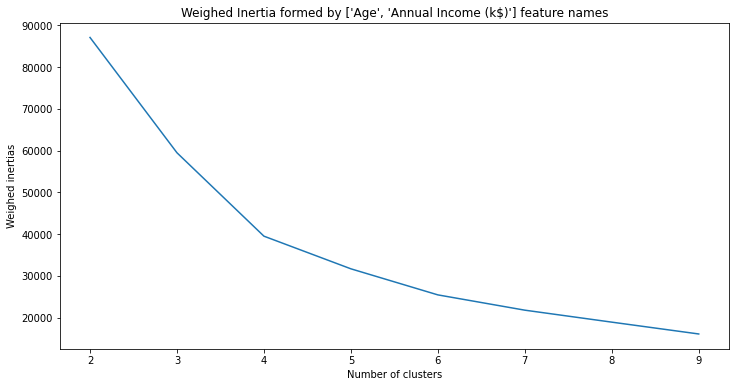

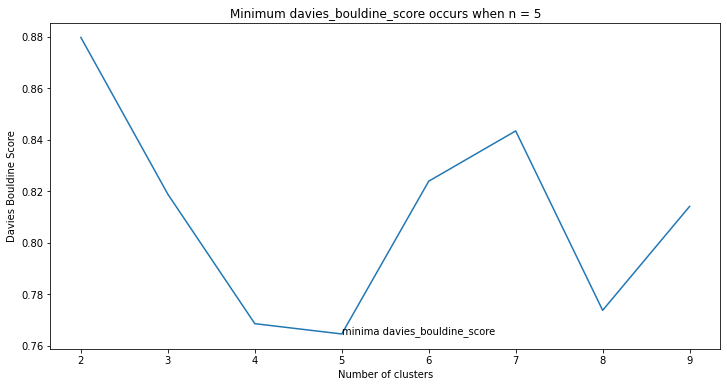

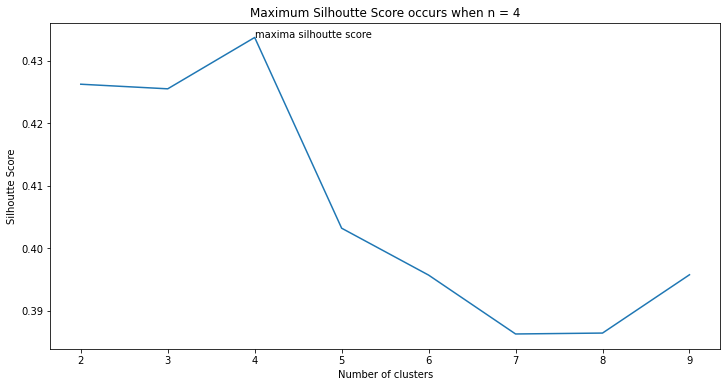

In [309]:
clusterOne.plotScores()

### 1. From the above plots, the dendrogram indicates fitting the model with 2 clusters will likely result into loose clusters and 4 clusters seam more tighter.
### 2. The Elbow plot indicates that a sharp decline happens when n = 4 meaning four clusters will be more appropriate.
### 3. Davies-Bouldin plot suggests low Davies-Bouldin Index appears at lower K value (e.g., 4, 5)
### 4. Silhoutte score plot suggests high Silhoutte score appears at lower K value (e.g., 3, 5)

# From all the above, a model with 4 clusters would seam more ideal

In [310]:
#Now we investigate age against spending score

In [311]:
X_ = df_copy.loc[:,['Age','Spending Score (1-100)']]

In [312]:
clusterTwo = Clustering(X_)

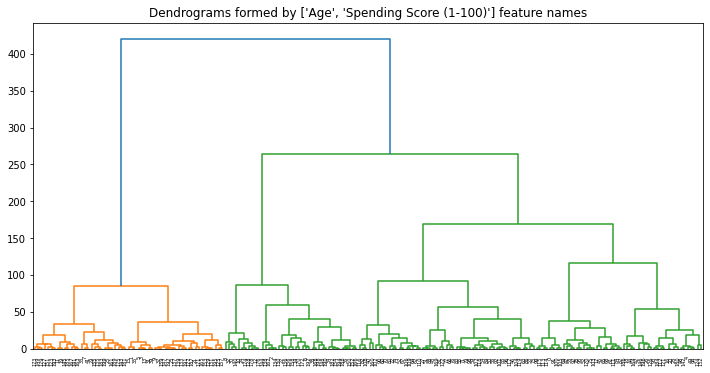

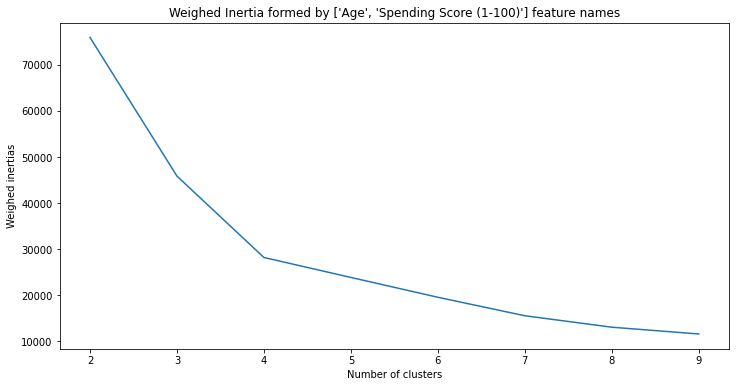

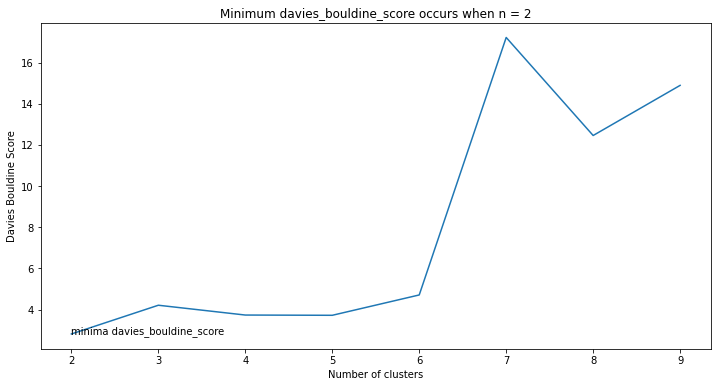

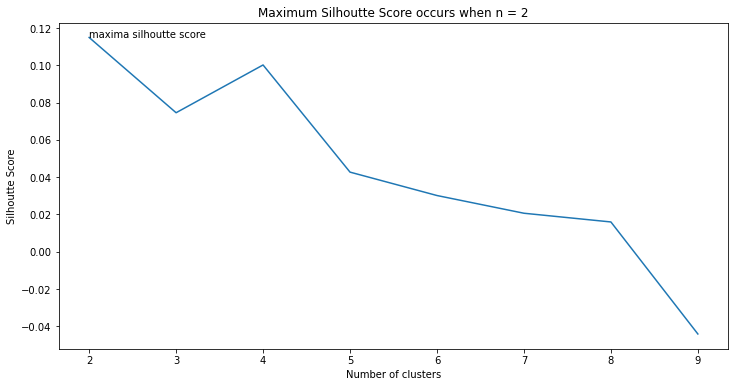

In [313]:
clusterTwo.plotScores()

### 1. From the above plots, the dendrogram indicates fitting the model with 2 clusters will likely result into loose clusters we therefore will attempt to fit 3 clusters which seam more tighter.
### 2. The Elbow plot indicates that a sharp decline happens when n = 3 or 4 meaning 3 or 4 clusters will be more appropriate.
### 3. Davies-Bouldin plot suggests low Davies-Bouldin Index appears at lower K value (e.g., 2,3,4,)
### 4. Silhoutte score plot suggests high Silhoutte score appears at lower K value (e.g., 2,3)

In [314]:
#Now we investigate Annual Income against spending score

In [315]:
X_hat = df_copy.loc[:,['Annual Income (k$)','Spending Score (1-100)']]

In [316]:
clusterThree = Clustering(X_hat)

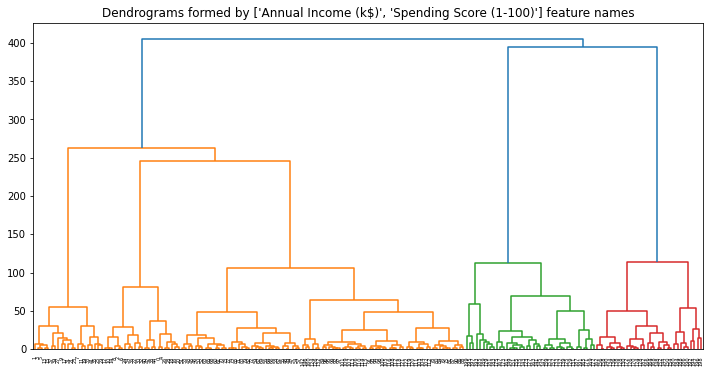

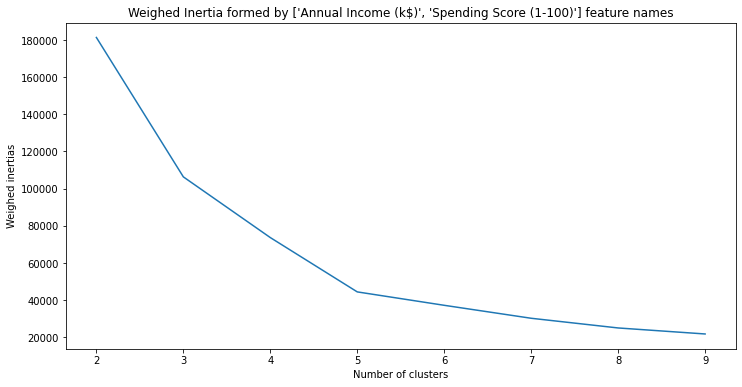

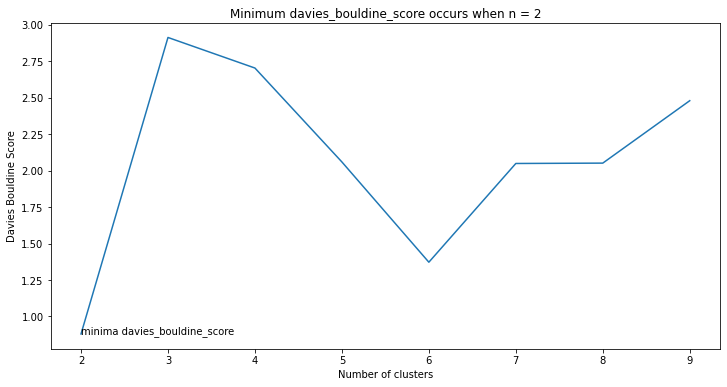

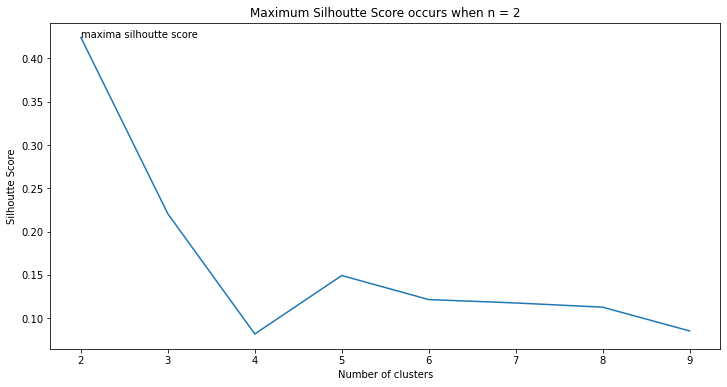

In [317]:
clusterThree.plotScores()

### 1. From the above plots, the dendrogram indicates fitting the model with 3 clusters will likely result into loose clusters we therefore will attempt to fit 5 clusters which seam more tighter.
### 2. The Elbow plot indicates that a sharp decline happens when n = 5 meaning 4 clusters will be more appropriate.
### 3. Davies-Bouldin plot suggests low Davies-Bouldin Index appears at lower K value (e.g., 2,5,6,)
### 4. Silhoutte score plot suggests high Silhoutte score appears at lower K value (e.g., 2,5)

In [291]:
scaler = StandardScaler()

In [292]:
df_copy.select_dtypes(include='float64').columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [293]:
numTransformer = ColumnTransformer([('numerical scaler', StandardScaler(), 
                                     df_copy.select_dtypes(include='float64').columns.tolist())
                                                 ], remainder = 'passthrough')

In [306]:
# df_copy.select_dtypes(include='float64').columns.tolist()

In [307]:
scaled_data = numTransformer.fit_transform(df_copy.iloc[:,:-1])

In [334]:
"""
We now try to plot when features are scaled
"""
modelFour = Clustering(pd.DataFrame(scaled_data, columns = df_copy.iloc[:,:-1].columns))

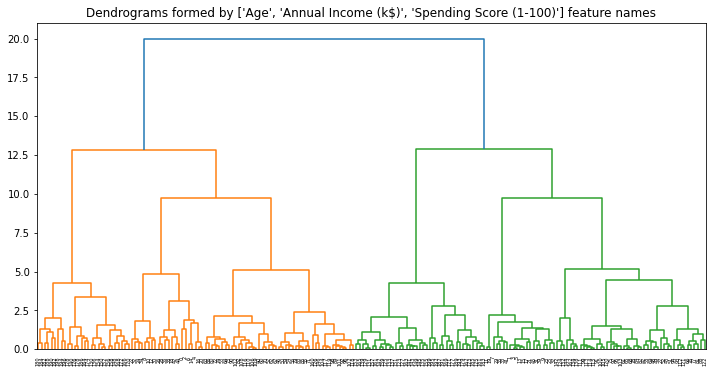

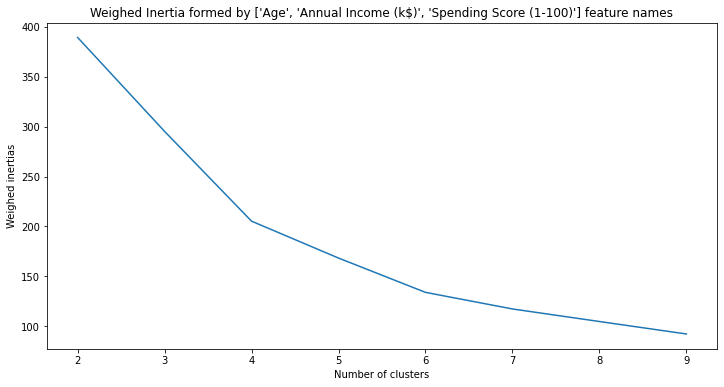

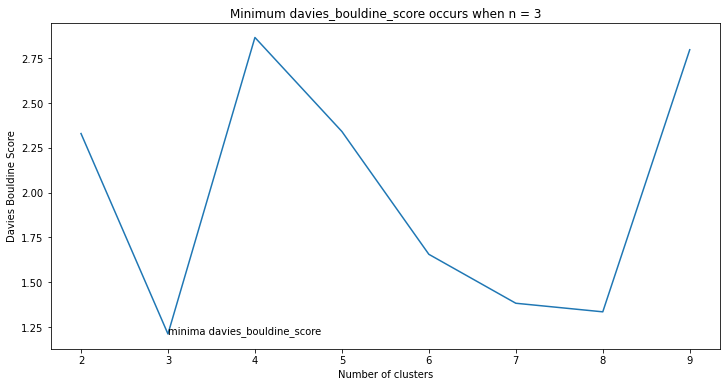

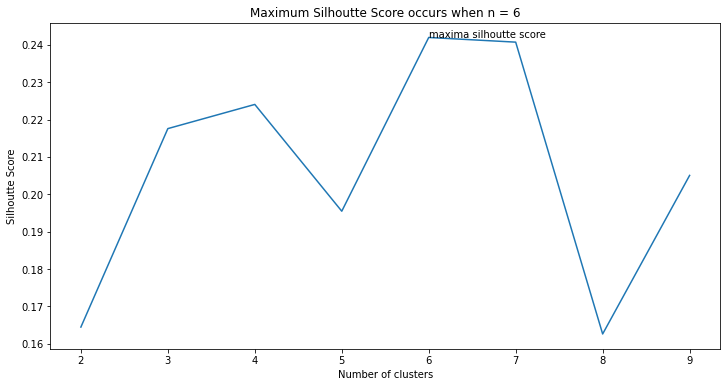

In [335]:
modelFour.plotScores()

In [338]:
# modelFour.scoring()['clusterCenters']

In [332]:
# scaled_data[:,]

In [343]:
df_copy.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Male'], dtype='object')

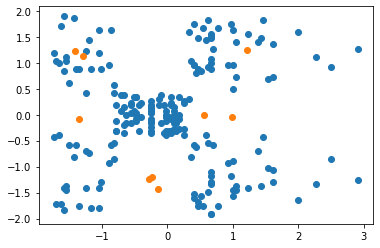

In [341]:
plt.scatter(scaled_data[:,1], scaled_data[:,2])
plt.scatter(modelFour.scoring()['clusterCenters'][:,1], modelFour.scoring()['clusterCenters'][:,2])

In [883]:
"""
Creating a model with four clusters
"""
modelOne = Kmeans(n_clusters = 4)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_copy[['Age','Annual Income (k$)']])

NameError: name 'Kmeans' is not defined

In [884]:
kmeans.cluster_centers_

array([[ 36.5       , 124.        ],
       [ 23.27777778,  60.38888889],
       [ 51.52380952,  33.19047619],
       [ 27.72727273,  20.59090909],
       [ 45.91176471,  65.94117647],
       [ 39.03846154,  93.42307692],
       [ 62.65217391,  53.2173913 ],
       [ 25.84210526,  40.05263158],
       [ 29.62068966,  76.79310345]])

In [572]:
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [573]:
# df_copy

In [574]:
def plotClusters(feature1, feature2):
    plt.scatter(df_copy[feature1], df_copy[feature2], c='r')
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='b', s = 120)
    plt.ylabel(feature2)
    plt.xlabel(feature1)
    plt.title(f"{feature1} and {feature2} divides the data into 3 visible clusters")
    for i in kmeans.cluster_centers_:
        plt.text(i[0], i[1], 'cluster')

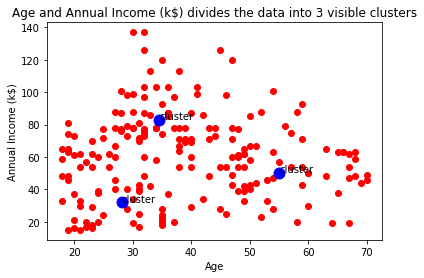

In [575]:
plotClusters('Age','Annual Income (k$)')

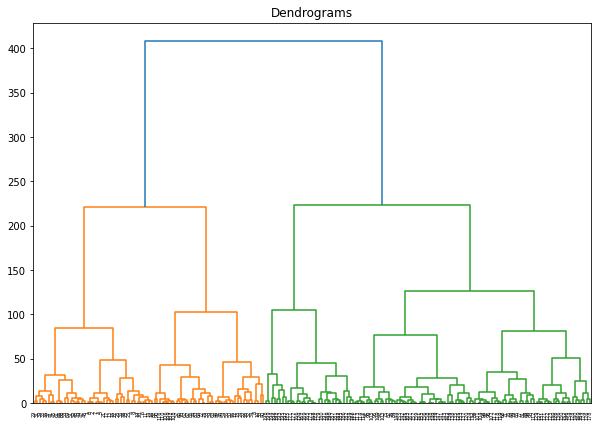

In [576]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_copy[['Age','Annual Income (k$)']], method='ward'))

In [577]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

In [578]:
x = df_copy[['Age','Annual Income (k$)']]
sse, db, shc = {}, {}, {}
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
#     clusters = kmeans.labels_
#     sse[k] = kmeans.inertia_
#     db[k] = davies_bouldin_score(x, clusters)
#     slc[k] = silhouette_score(x, clusters)
for k in range(2,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(x, clusters)
    shc[k] = silhouette_score(x, clusters)

Text(0, 0.5, 'Inertia')

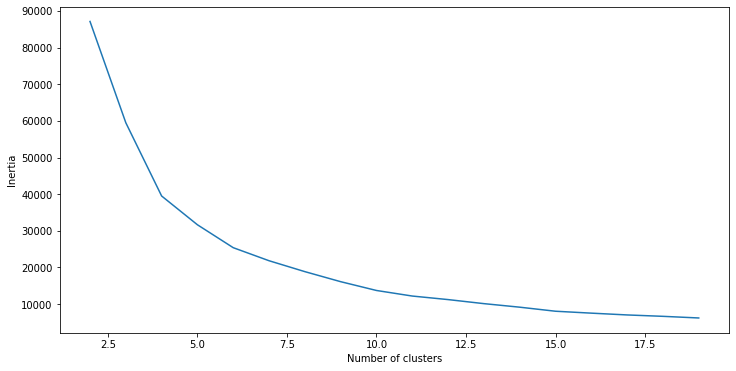

In [579]:
plt.figure(figsize=(12,6))
plt.plot(sse.keys(), sse.values())
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [580]:
shs

0.3957399109884051

# Plot of Silhouette index with the number of clusters.
# This plot suggests high Silhouette index appears at lower K value(e.g., 2, 3)

Text(0, 0.5, 'Silhouette Score')

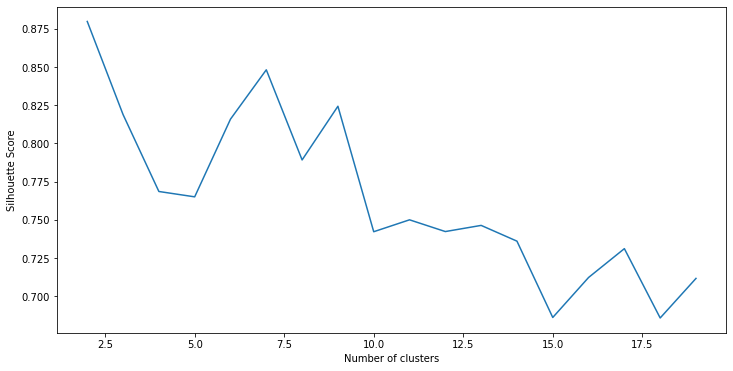

In [581]:
plt.figure(figsize=(12,6))
plt.plot(db.keys(), db.values())
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

# Plot of Davies-Bouldin Index with the number of clusters.
# This plot also suggests low Davies-Bouldin Index appears at lower K value (e.g., 2, 3)

Text(0, 0.5, 'Davies-Bouldin Values')

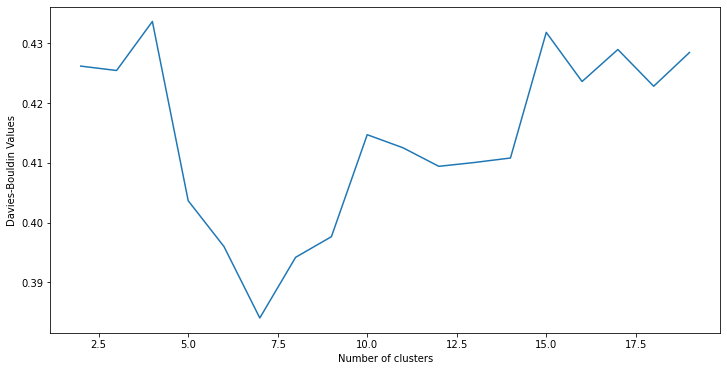

In [582]:
plt.figure(figsize=(12,6))
plt.plot(shc.keys(), shc.values())
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Values')

In [542]:
shc.keys

{2: 0.42620850066216065,
 3: 0.4245960102906784,
 4: 0.43368606798330267,
 5: 0.40157587536205724,
 6: 0.39567635882797675,
 7: 0.38735262561826417,
 8: 0.39402130791889556,
 9: 0.40064268938617476}

In [486]:
kmeans.inertia_

59486.961439280356

In [308]:
names = [['juma',10], ['erick', 30], ['jimmy', 90],['erick', 75]]
do = pd.DataFrame(names, columns = ['name','age'])

In [329]:
one = OneHotEncoder(sparse='False', handle_unknown = 'ignore', dtype='int')

In [330]:
one.fit_transform(do[['name']])

<4x2 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [331]:
labs = one.fit_transform(do[['name']])
do['name'] = labs.toarray()

In [332]:
do

,name,age
0,1,10
1,0,30
2,1,90
3,0,75


In [482]:
# kmeans.cluster_centers_

In [216]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(random_state=0,n_clusters=5)

In [13]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
df['Gender']=pd.DataFrame(encoder.fit_transform(df['Gender'].values))
#male 1 and female 2

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler =StandardScaler()

In [20]:
scaled_data = pd.DataFrame(scaler.fit_transform(df.iloc[:,:]), columns=df.columns)

In [21]:
# df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']] = scaled_data

In [22]:
df=scaled_data

In [23]:
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [24]:
kmeans.cluster_centers_

array([[-0.88640526, -0.75387645,  0.00916066,  0.71643426],
       [ 1.12815215,  1.31794399, -0.52575662, -0.44589335],
       [-0.88640526,  0.70840399, -0.5486456 , -0.4086195 ],
       [ 0.27349143,  0.13472565,  1.08669522, -1.29122864],
       [ 1.12815215, -0.74015963,  0.04751628,  0.81127593]])

In [25]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

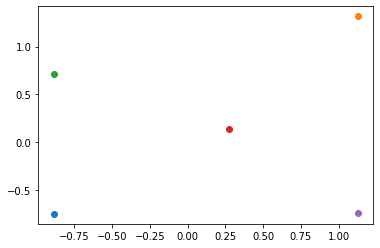

In [26]:
for i in kmeans.cluster_centers_:
    plt.scatter(i[0],i[1])

In [27]:
kmeans.inertia_

325.44857048543486

In [28]:
import matplotlib.pyplot as plt

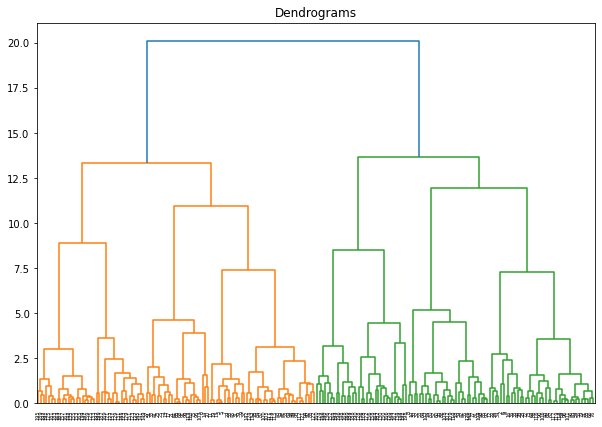

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [30]:
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

In [31]:
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})

In [32]:
cluster_df

,Cluster,sse
0,1,800.000000
1,2,588.802677
2,3,476.773207
3,4,386.714786
4,5,325.746234
5,6,274.694839
6,7,236.878199
7,8,200.287947
8,9,174.188000
9,10,157.714202


Text(0, 0.5, 'Inertia')

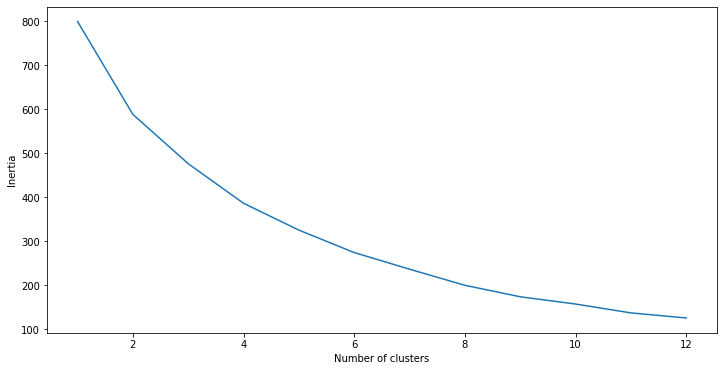

In [33]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [34]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 13), sse, curve="convex", direction="decreasing" )

In [35]:
# %pip install --upgrade kneed

In [36]:
kl.elbow

4

In [37]:
kmeans = KMeans(kl.elbow)
kmeans.fit(df)
predictions = kmeans.predict(df)

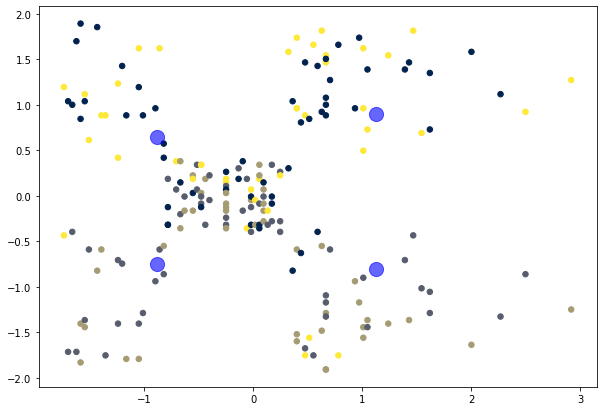

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=predictions, s=30, cmap='cividis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=200, alpha=0.6)

In [39]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [69]:
from  sklearn.preprocessing import LabelBinarizer

In [70]:
users = df_copy

In [75]:
binarizer = LabelBinarizer()

In [77]:
users['binarized']=binarizer.fit_transform(users['Gender'])

In [67]:
pd.get_dummies(users['Gender'], drop_first=True)

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [78]:
users

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),binarized
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [90]:
sm = [['erick',20,'male'],['james',34,'female'],['juma',22,'others']]

In [92]:
sb = pd.DataFrame(sm, columns=['names','ages','gender'])

In [98]:
pd.DataFrame(binarizer.fit_transform(sb['gender']))

,0,1,2
0,0,1,0
1,1,0,0
2,0,0,1


In [102]:
pd.DataFrame(encoder.fit_transform(sb['gender']))

,0
0,1
1,0
2,2


In [103]:
pd.get_dummies(sb['gender'])

,female,male,others
0,0,1,0
1,1,0,0
2,0,0,1


In [559]:
# !pip install --upgrade kneed